# Conservation of modified quantities

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from odes import *
from scipy import integrate

## Problem setup

In [117]:
h = 0.1 # discretisation parameter
N = 5*int(1e3) # number of steps in time direction
m = 5  # number of steps in stencil

# matrices in stencil
a1 = 0.85 # choose a >= 1/4 for a stable method
a2 = 1.25 # choose a >= 1/4 for a stable method
A2 = np.zeros((2,2))
A2[0,0]=a1
A2[1,1]=a2
A1 = np.identity(2)-4*A2

a = np.zeros((3,3))
a[1:,1:]=A1

# Jet of potential, starting with primitive
UJet = [0]*10

In [118]:
# UJet[0] = [lambda x: 1/2*(-x[0]**2-x[1]**2) , lambda x: -1*x[1], lambda x: -1, lambda x:0, lambda x: 0, lambda x:0 ]
# UJet[1] = [lambda x: -1*x[0], lambda x:0, lambda x: 0, lambda x:0, lambda x:0  ]
# UJet[2] = [lambda x: -1, lambda x:0, lambda x: 0, lambda x:0 ]
# UJet[3] = [lambda x: 0, lambda x:0, lambda x: 0, lambda x:0 ]
# UJet[4] = [lambda x: 0, lambda x:0, lambda x: 0, lambda x:0 ]
# UJet[5] = [lambda x: 0, lambda x:0, lambda x: 0, lambda x:0 ]


In [119]:
UJet =[ [ 
 lambda x: np.exp(-0.5*x[0]**2 - x[1]**2/2.), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[1]), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[1]**2), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[1]*(-3 + x[1]**2)), 
 lambda x:   np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[1]**2 + x[1]**4), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[1]*(15 - 10*x[1]**2 + x[1]**4))], 
[ lambda x: -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*x[1], 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-1 + x[1]**2)), 
 lambda x:    np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*x[1]*(-3 + x[1]**2), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(3 - 6*x[1]**2 + x[1]**4)), 
 lambda x:     np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*x[1]*(15 - 10*x[1]**2 + x[1]**4)], 
[ lambda x: np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2)*x[1]), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2)*(-1 + x[1]**2), 
 lambda x:     -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2)*x[1]*(-3 + x[1]**2)), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2)*(3 - 6*x[1]**2 + x[1]**4), 
 lambda x:         -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(-1 + x[0]**2)*x[1]*(15 - 10*x[1]**2 + x[1]**4))], 
[ lambda x: -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)*x[1], 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)*(-1 + x[1]**2)), 
 lambda x:         np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)*x[1]*(-3 + x[1]**2), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)*(3 - 6*x[1]**2 + x[1]**4)), 
 lambda x:         np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(-3 + x[0]**2)*x[1]*(15 - 10*x[1]**2 + x[1]**4)], 
[ lambda x: np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4)*x[1]), 
 lambda x:         np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4)*(-1 + x[1]**2), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4)*x[1]*(-3 + x[1]**2)), 
 lambda x:         np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4)*(3 - 6*x[1]**2 + x[1]**4), 
 lambda x:-(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*(3 - 6*x[0]**2 + x[0]**4)*x[1]*(15 - 10*x[1]**2 + x[1]**4))], 
[ lambda x: -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)*x[1], 
 lambda x:         -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)*(-1 + x[1]**2)), 
 lambda x:np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)*x[1]*(-3 + x[1]**2), 
 lambda x:         -(np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)*(3 - 6*x[1]**2 + x[1]**4)), 
 lambda x:         np.exp(-0.5*x[0]**2 - x[1]**2/2.)*x[0]*(15 - 10*x[0]**2 + x[0]**4)*x[1]*(15 - 10*x[1]**2 + x[1]**4)]]

## Compute consistent initial values using a modified ODE
0, 1h,2h,...,(m-1)*h

In [120]:
# integrate ode until (m-1)*h using small Euler steps
NN = 200
hh=h/NN

zz = np.zeros(((m-1)*NN+1,4))
zz[0] = [1.,-1.,0.1,-0.2]

for j in range(1,(m-1)*NN+1):
    # zz[j] = zz[j-1]+hh*ode0(zz[j-1],UJet,a)
    # zz[j] = zz[j-1]+hh*ode2(zz[j-1],UJet,a,h)
     zz[j] = zz[j-1]+hh*ode4(zz[j-1],UJet,a,h)

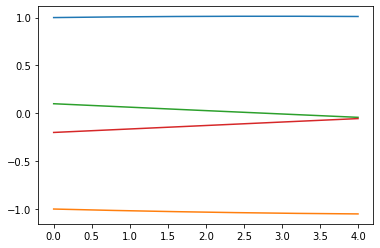

In [121]:
plt.plot(np.linspace(0,m-1,(m-1)*NN+1),zz)


## Continue solution using functional equation

In [122]:
# initialisation 
y = np.zeros((N,2))

# initialise m-1 previous values consistently
for j in range(0,m):
    y[j] = zz[j*NN,:2]

In [123]:
# compute values of functional equation
for j in range(2,N-2):
    
    #b = -A2.dot(y[j-2]) - A1.dot(y[j-1]) + 4*y[j]-A1.dot(y[j+1]) + h**2*np.array([UJet[1][0](y[j]),UJet[0][1](y[j])])
    b = -A1.dot(y[j+1]+y[j-1]) + 2*A1.dot(y[j])+2*A2.dot(y[j])-A2.dot(y[j-2])+ h**2*np.array([UJet[1][0](y[j]),UJet[0][1](y[j])])
    
    y[j+2]=np.linalg.solve(A2,b)
    
    

In [124]:
# Compare with scipy integrate
xi0 = np.linspace(0,(N-1)*h,N)
scode=integrate.solve_ivp(lambda t,z: ode0(z,UJet,a),[0,(N-1)*h],zz[0],t_eval=xi0)

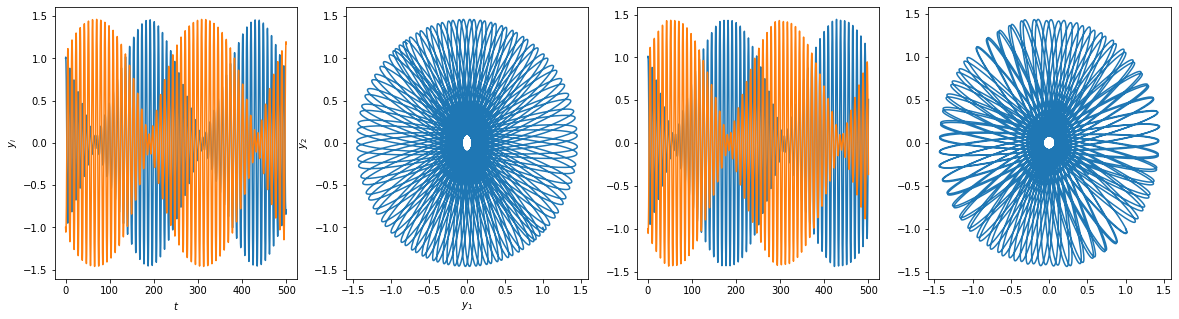

In [125]:
# plot solution

fig,axs = plt.subplots(1,4,figsize=(20,5))
axs[0].plot(xi0,y,'-')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$y_i$')
axs[1].plot(y[:,0],y[:,1])
axs[1].set_xlabel(r'$y_1$')
axs[1].set_ylabel(r'$y_2$')

axs[2].plot(scode['t'],scode['y'][0],scode['t'],scode['y'][1])
axs[3].plot(scode['y'][0],scode['y'][1])

#fig.savefig('dynamics.pdf')

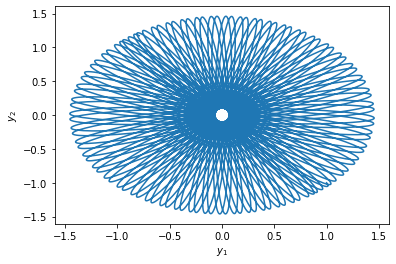

In [141]:
plt.plot(y[:,0],y[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
fig.savefig('dynamics.pdf')

## Modified Hamiltonian

In [126]:
H0, H2, H4 = Hmod(y,UJet,a,h)

Text(0.5, 0, '$t$')

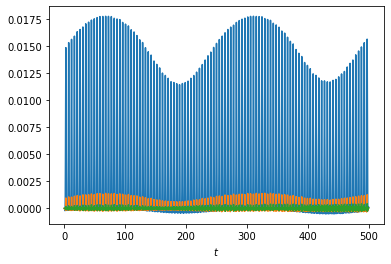

In [127]:
xi = xi0[2:-2]

# plot
plt.plot(xi,H0-H0[0],xi,H2-H2[0],xi,H4-H4[0])
plt.xlabel(r'$t$')
#plt.savefig('modHam.pdf')

Text(0.5, 0, '$t$')

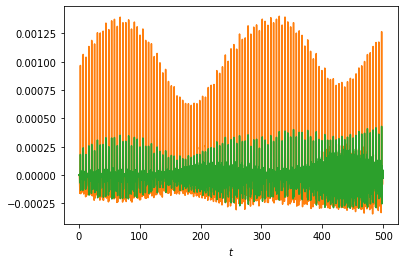

In [135]:
# plot
plt.plot(xi,H2-H2[0],'C1',xi,H4-H4[0],'C2')
plt.xlabel(r'$t$')
#plt.savefig('modHam24.pdf')

In [136]:
H0sc,_,_ = Hmod(np.transpose(scode['y']),UJet,a,h)

Text(0.5, 0, '$t$')

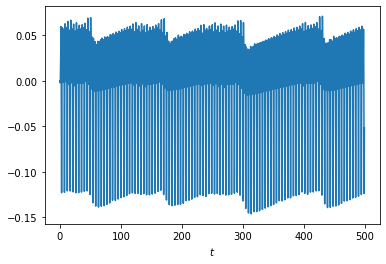

In [137]:
# plot
plt.plot(scode['t'][2:-2],H0sc-H0sc[0])
plt.xlabel(r'$t$')

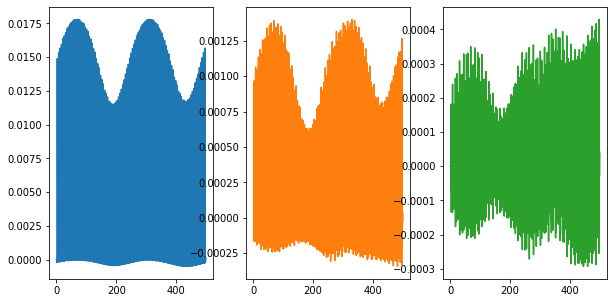

In [138]:
fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].plot(xi,H0-H0[0],'C0')
axs[1].plot(xi,H2-H2[0],'C1')
axs[2].plot(xi,H4-H4[0],'C2')


Text(0.5, 0, '$\\xi$')

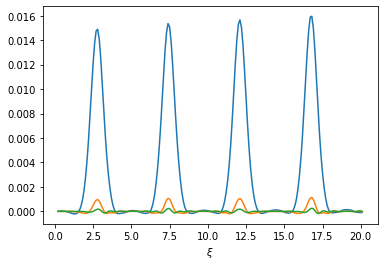

In [131]:
# plot small section
ct = 200
plt.plot(xi[:ct],H0[:ct]-H0[0],xi[:ct],H2[:ct]-H2[0],xi[:ct],H4[:ct]-H4[0])
plt.xlabel(r'$\xi$')
#plt.savefig('modHam_section.pdf')

Text(0.5, 0, '$t$')

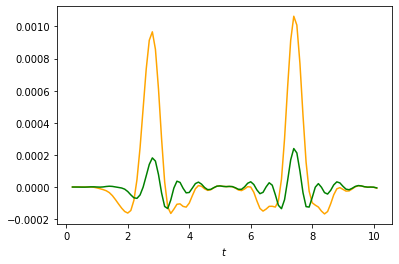

In [132]:
# plot small section
ct = 100
plt.plot(xi[:ct],(H2[:ct]-H2[0]),'orange',xi[:ct],(H4[:ct]-H4[0]),'g')
plt.xlabel(r'$t$')
#plt.savefig('modHam_section.pdf')